In [ ]:
"""Tasks to Solve:
Load the data using pandas.

Clean the data (check for nulls, duplicates).

Add a new column: Order_Amount = Quantity × Unit Price.

Total revenue: Sum of all Order_Amount.

Top 5 selling products by quantity.

Monthly sales trend: Line chart of total Order_Amount per month.

Best city by sales amount.

Category-wise revenue distribution: Pie chart or bar plot.

Save your final cleaned dataset as a new CSV."""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load the data using pandas
df=pd.read_csv(r"C:\Users\ladwa\Desktop\New folder (6)\sales_data_100.csv")


In [4]:
df.head()


,Order_ID,Order_Date,Customer_Name,Product,Category,Quantity,Unit_Price,Order_Amount,City
0,ORD1001,2025-02-06,Marcia Butler,Book,Stationery,4,500,2000,Pune
1,ORD1002,2025-01-17,Diane Schroeder,Smartphone,Electronics,3,30000,90000,Bangalore
2,ORD1003,2024-12-31,Nicole Miller,Sneakers,Footwear,1,2500,2500,Pune
3,ORD1004,2025-03-30,Ariana Martin,Smartphone,Electronics,1,30000,30000,Bangalore
4,ORD1005,2025-05-21,Travis Brown,Laptop,Electronics,4,45000,180000,Kolkata


In [5]:
#Clean the data (check for nulls, duplicates)
df.isnull().sum()

Order_ID         0
Order_Date       0
Customer_Name    0
Product          0
Category         0
Quantity         0
Unit_Price       0
Order_Amount     0
City             0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'Product', 'Category',
       'Quantity', 'Unit_Price', 'Order_Amount', 'City'],
      dtype='object')

In [8]:
#Add a new column: Calculate_Order_Amount = Quantity × Unit Price.
df["Calculate_Order_Amount"]=df["Quantity"]*df["Unit_Price"]

In [9]:
df["Calculate_Order_Amount"]

0       2000
1      90000
2       2500
3      30000
4     180000
       ...  
95     90000
96      6000
97       600
98      3000
99      1000
Name: Calculate_Order_Amount, Length: 100, dtype: int64

In [12]:
#Total revenue: Sum of all Order_Amount
total_sum=df["Order_Amount"].sum()
print("Total Revenue:", total_sum)

Total Revenue: 2952100


In [11]:
total_sum

2952100

In [19]:
#Top 5 selling products by quantity.
top_5=df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(5)


In [20]:
top_5


Product
Laptop        41
Sneakers      38
Watch         33
Headphones    31
Smartphone    27
Name: Quantity, dtype: int64

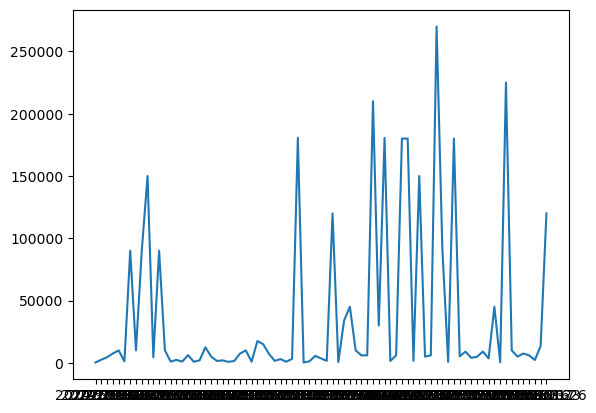

In [24]:
#Monthly sales trend: Line chart of total Order_Amount per month  #Order_Date
filter_1=df.groupby("Order_Date")["Order_Amount"].sum().sort_index()
plt.plot(filter_1.index,filter_1.values)
plt.show()


In [28]:
#datetime
df["Order_Date"]=pd.to_datetime(df["Order_Date"])
df["Month"]=df["Order_Date"].dt.to_period('M')

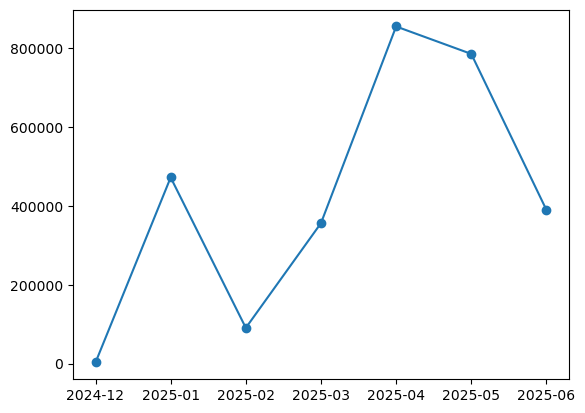

In [31]:
monthly_report=df.groupby("Month")["Order_Amount"].sum().sort_index()
plt.plot(monthly_report.index.astype(str),monthly_report.values,marker='o')
plt.show()

In [25]:
from datetime import date


In [35]:
#Best city by sales amount
best_city=df.groupby("City")["Order_Amount"].sum().sort_values(ascending=False)
best_city

City
Delhi         712300
Mohali        637700
Bangalore     555900
Pune          411400
Kolkata       268300
Chandigarh    218900
Mumbai        147600
Name: Order_Amount, dtype: int64

In [36]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'Product', 'Category',
       'Quantity', 'Unit_Price', 'Order_Amount', 'City',
       'Calculate_Order_Amount', 'Month'],
      dtype='object')

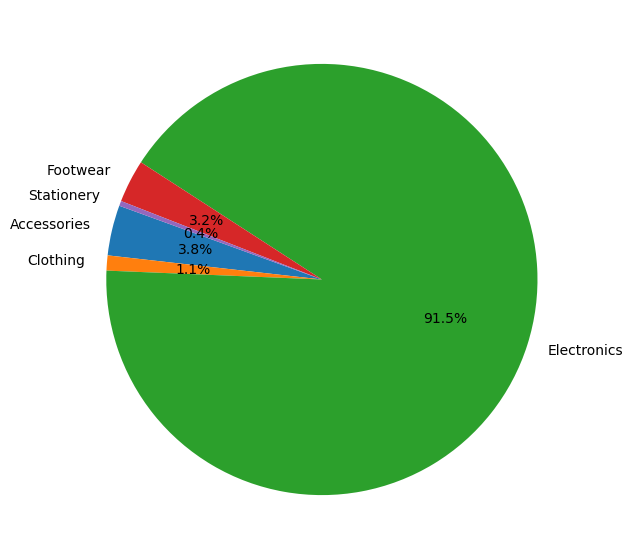

In [43]:
#Category-wise revenue distribution: Pie chart or bar plot
filter_3=df.groupby("Category")["Order_Amount"].sum().sort_index()
plt.figure(figsize=(7,7))
plt.pie(filter_3 ,labels=filter_3.index,autopct="%1.1f%%",startangle=160)

plt.show()

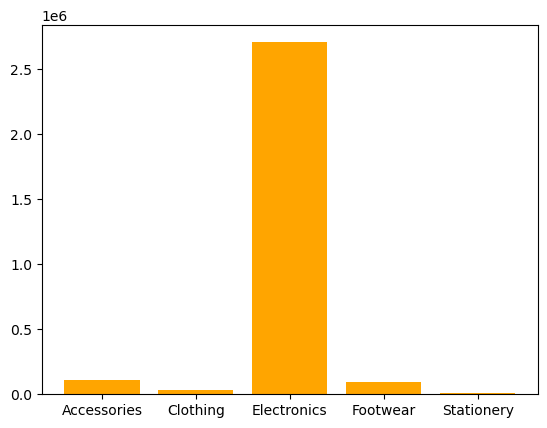

In [45]:
plt.bar(filter_3.index,filter_3.values ,color="orange")
plt.show()

In [ ]:
#Save your final cleaned dataset as a new CSV.
df.to_csv("cleaned_ecommerce.csv",)